In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [97]:
df = pd.read_csv("maybe_final_dataset_with_only_exp_data_1000_atoms_streaming_5.csv")

In [29]:
df2 = pd.read_csv("maybe_final_dataset_with_only_exp_data_1000_atoms_streaming_5_before.csv")

In [21]:
df.head()

,PDB,No. a.a.,Glycine,S.S.,Long SS,Charge,SASA,No. pos.,No. Surf. pos.,Pos. area,...,Neg. area,No. hyd.,No. Surf. hyd.,hyd. area,Alpha,Beta,Salt bridges,H-bonds,coords,atom_len
0,1KQV,79,5,0.0,N,-6,5088.779297,11,10,1377.222534,...,1224.603271,28,16,846.616516,72.000000,0.000000,3,73,"[('N', 0.0, 0.0, 1.0), ('C', 0.0, -1.245, 1.0)...",600
1,2LO9,24,4,3.0,2,5,2329.424561,7,7,1349.644287,...,257.636139,2,2,244.853607,79.166667,0.000000,0,22,"[('N', 0.784, 2.408, 1.0), ('C', 0.631, 1.129,...",187
2,1YWW,85,9,0.0,N,-1,4429.139648,13,12,1393.878662,...,1125.815430,25,14,823.952698,72.307692,0.000000,11,79,"[('N', 9.125, -4.535, 1.0), ('C', 7.817, -5.20...",537
3,1ECI,37,3,1.0,1,3,3310.657959,7,7,1076.215332,...,306.275421,13,13,945.152832,72.972973,0.000000,1,38,"[('N', -14.009, 7.409, 1.0), ('C', -13.171, 6....",550
4,2K7G,29,4,3.0,3,0,2150.773438,1,1,89.623283,...,27.525930,7,7,934.919983,10.344828,51.724138,0,26,"[('N', 8.22, 0.903, 1.0), ('C', 8.946, 0.247, ...",202


# Histogram gen

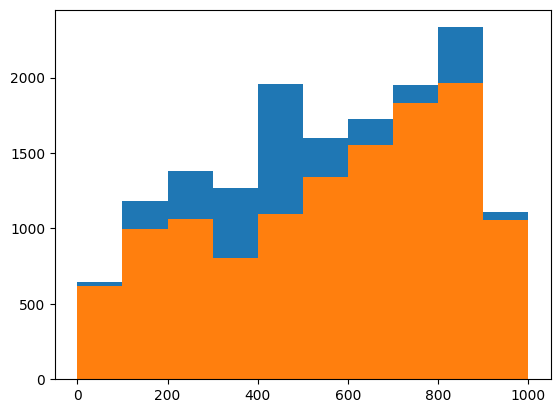

In [33]:
hi2 = plt.hist(df2.atom_len,bins=[0,100,200,300,400,500,600,700,800,900,1000])
hi = plt.hist(df.atom_len,bins=[0,100,200,300,400,500,600,700,800,900,1000])


In [34]:
hi2

(array([ 647., 1183., 1380., 1271., 1959., 1602., 1725., 1951., 2334.,
        1109.]),
 array([   0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,
         900., 1000.]),
 <BarContainer object of 10 artists>)

In [35]:
hi

(array([ 620.,  996., 1061.,  806., 1095., 1340., 1556., 1832., 1963.,
        1058.]),
 array([   0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,
         900., 1000.]),
 <BarContainer object of 10 artists>)

# Random Pred Calc

In [109]:
df = pd.read_csv("maybe_final_dataset_with_only_exp_data_1000_atoms_streaming_5.csv")

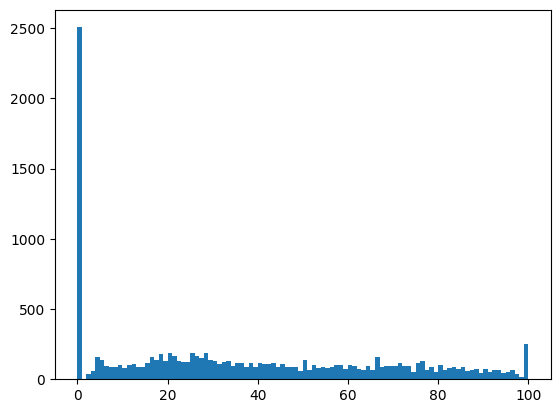

In [110]:
target_bin = plt.hist(df.Alpha,bins=100)

In [111]:
import numpy as np

In [112]:
np.mean(target_bin[0][1:-2])

98.47422680412372

In [113]:
target0_index = df[df.Alpha==0].index
target100_index = df[df.Alpha==100].index

In [114]:
np.random.seed(42)
selected_tar0 = np.random.choice(target0_index,98)
selected_tar100 = np.random.choice(target100_index,98)

In [115]:
drop_idxs0 = np.array(list(set(list(target0_index))-set(selected_tar0)))
drop_idxs100 = np.array(list(set(list(target100_index))-set(selected_tar100)))

In [116]:
len(drop_idxs0)

2409

In [117]:
new_df = df.drop(drop_idxs0)
new_df = new_df.drop(drop_idxs100)
new_df

,PDB,No. a.a.,Glycine,S.S.,Long SS,Charge,SASA,No. pos.,No. Surf. pos.,Pos. area,...,Neg. area,No. hyd.,No. Surf. hyd.,hyd. area,Alpha,Beta,Salt bridges,H-bonds,coords,atom_len
0,1KQV,79,5,0.0,N,-6,5088.779297,11,10,1377.222534,...,1224.603271,28,16,846.616516,72.000000,0.000000,3,73,"[('N', 0.0, 0.0, 1.0), ('C', 0.0, -1.245, 1.0)...",600
1,2LO9,24,4,3.0,2,5,2329.424561,7,7,1349.644287,...,257.636139,2,2,244.853607,79.166667,0.000000,0,22,"[('N', 0.784, 2.408, 1.0), ('C', 0.631, 1.129,...",187
2,1YWW,85,9,0.0,N,-1,4429.139648,13,12,1393.878662,...,1125.815430,25,14,823.952698,72.307692,0.000000,11,79,"[('N', 9.125, -4.535, 1.0), ('C', 7.817, -5.20...",537
3,1ECI,37,3,1.0,1,3,3310.657959,7,7,1076.215332,...,306.275421,13,13,945.152832,72.972973,0.000000,1,38,"[('N', -14.009, 7.409, 1.0), ('C', -13.171, 6....",550
4,2K7G,29,4,3.0,3,0,2150.773438,1,1,89.623283,...,27.525930,7,7,934.919983,10.344828,51.724138,0,26,"[('N', 8.22, 0.903, 1.0), ('C', 8.946, 0.247, ...",202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12323,2LYP,66,1,0.0,N,2,4448.812988,9,9,939.568542,...,656.454468,29,20,1490.660767,71.212121,6.060606,0,67,"[('N', 5.658, -9.717, 1.0), ('C', 5.709, -8.50...",544
12324,2MQH,82,14,0.0,N,-2,6060.620605,8,7,1023.832275,...,1115.060669,23,20,1450.909668,4.166667,33.333333,0,28,"[('N', 0.0, 0.0, 1.0), ('C', 0.001, -1.247, 1....",546
12325,2HGM,126,16,0.0,N,-1,5200.816895,13,11,1052.048584,...,1024.213501,41,21,1261.239624,25.000000,22.826087,15,111,"[('N', 15.928, 3.146, 1.0), ('C', 15.371, 4.02...",722
12326,1LR7,74,6,5.0,4,6,5072.471191,15,15,1614.037598,...,771.645264,17,13,747.020569,23.287671,26.027397,0,59,"[('N', 11.262, 35.912, 1.0), ('C', 10.164, 35....",522


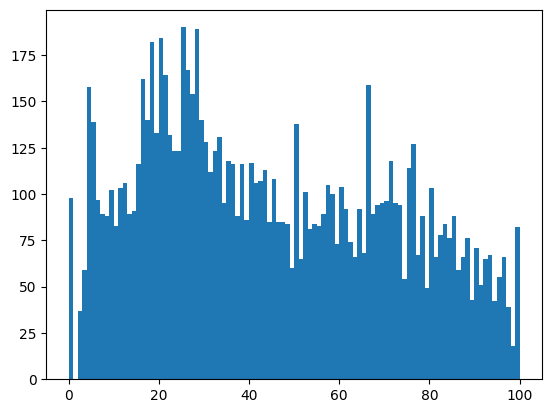

In [118]:
target_bin = plt.hist(new_df.Alpha,bins=100)

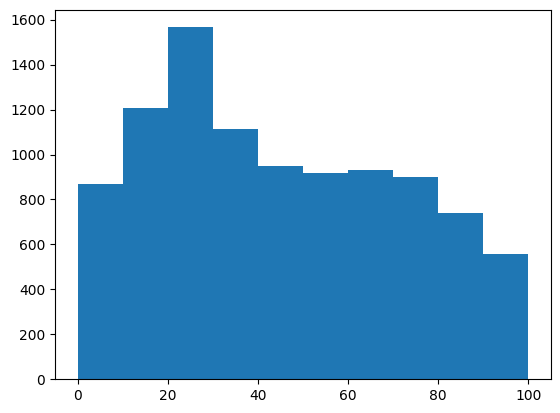

In [119]:
target_bin = plt.hist(new_df.Alpha,bins=10)

In [122]:
targets = new_df.Alpha

In [124]:
stand_tar = (targets-np.mean(targets))/np.std(targets)

(array([ 867., 1205., 1566., 1113.,  950.,  919.,  933.,  902.,  739.,
         556.]),
 array([-1.67129063, -1.2985126 , -0.92573457, -0.55295654, -0.18017851,
         0.19259952,  0.56537755,  0.93815558,  1.31093361,  1.68371164,
         2.05648967]),
 <BarContainer object of 10 artists>)

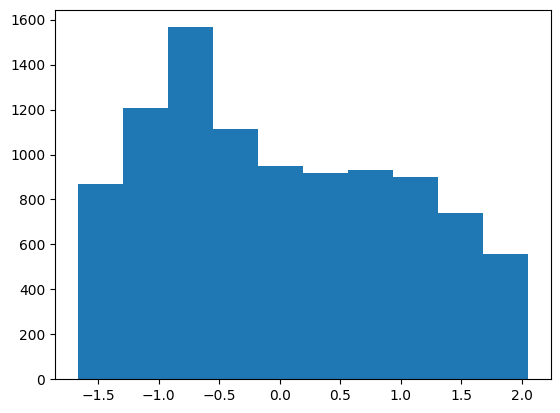

In [125]:
plt.hist(stand_tar)

In [144]:
mmse = []
for i in range(10000):
    random_preds = np.random.uniform(min(stand_tar),max(stand_tar),[len(stand_tar)])
    mse = ((stand_tar - random_preds)**2).mean(axis=0)
    mmse.append(mse)

In [145]:
np.mean(mmse)

2.1950230678593123

In [148]:
((stand_tar - [0]*len(stand_tar))**2).mean(axis=0)

1.0